<a href="https://colab.research.google.com/github/ThangDoan2001/TensorFlow_ZeroToHero/blob/master/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow 

There are many definitions for a regression problem but in our case, we're going to simplify it: predecting a numerical variable based on some other combination of variables, even shorter .... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.5.0'

## Creating some data to view and fit

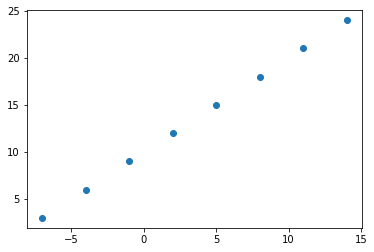

In [3]:
 import numpy as np
 import matplotlib.pyplot as plt

 # Create features
 X = np.array([-7., -4., -1., 2., 5. , 8., 11., 14.])


 # Create lables
 y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

 # Visualize it
 plt.scatter(X, y);

In [6]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and out put shape

In [9]:
# Create a demo tensor for our housing preice predictions problem
house_info = tf.constant(["bedroom", "bathroom", "gargage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'gargage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [12]:
X[0], y[0]

(-7.0, 3.0)

In [13]:
X[1], y[1]

(-4.0, 6.0)

In [15]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [17]:
X[0].ndim

0

In [18]:
X[0], y[0]

(-7.0, 3.0)